# Lab04: Data manipulation

**Brief Honor Code**. Do the homework on your own. You may discuss ideas with your classmates, but DO NOT copy the solutions from someone else or the Internet. If stuck, discuss with TA.

In [1]:
# Libraries
%matplotlib inline

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import string
import toolz as tz
from scipy.stats import chi2_contingency

**1**. (10 points)

Write a function `pdsist(xs)` which returns a matrix of the pairwise distance between the collection of vectors in `xs` using Euclidean distance.

Recall that Euclidean distance between two vectors $x$ and $y$ is

$$
d(x, y) = \sqrt{\sum{(y-x)^2}}
$$ 

Find the square distance matrix for
```python
xs = np.array([[0.20981496, 0.54777461, 0.9398527 ],
       [0.63149939, 0.935947  , 0.29834026],
       [0.46302941, 0.25515557, 0.0698739 ],
       [0.38192644, 0.42378508, 0.26055664],
       [0.46307302, 0.05943961, 0.60204931]])
```

Do this **without** using any for loops.

In [2]:
# Test matrix
xs = np.array([[0.20981496, 0.54777461, 0.9398527 ],
               [0.63149939, 0.935947  , 0.29834026],
               [0.46302941, 0.25515557, 0.0698739 ],
               [0.38192644, 0.42378508, 0.26055664],
               [0.46307302, 0.05943961, 0.60204931]])

# Explanation:
- We want to find the pairwise distances between the 5 vectors of size 3, but can't loop
- Therefore, we want to perform some matrix operation
- Solution: increase dimension of matrices instead of looping

In [3]:
# Original matrix shape:
xs.shape

(5, 3)

In [4]:
# Matrix after adding a y-axis:
xs[:, None].shape

(5, 1, 3)

In [5]:
# Matrix after adding an x-axis:
xs[None, :].shape

(1, 5, 3)

# How does adding these axes help?
- Adding the axes has produced two matrices of size (5, 1, 3) and (1, 5, 3)
- Now, when we subtract them, we can think of it as taking the difference between five (1, 3)-sized vectors and one (5, 3) matrix
- In effect, this is the same as looping over the original matrix and generating five pairwise distance matrices
- Note that because we're finding the difference matrix between five (1, 3)-sized vectors and one (5, 3) sized matrix, our new dimension should be (5, 5, 3)

In [6]:
# New dimension after subtraction and broadcasting:
(xs[:, None] - xs[None, :]).shape

(5, 5, 3)

- After subtracting the matices, we can use np.sum(xs, -1) to sum along the axis containing the 3-dimensional vector values
- This will yield the (5, 5) matrix we're looking for

In [7]:
# Pairwise Euclidean Distance: turn n*k distance matrix into n*n pairwise distance matrix
def pdist(xs):
    return np.sqrt(np.sum((xs[:, None] - xs[None, :])**2, -1))

In [8]:
# With the test data:
pdist(xs)

array([[0.        , 0.86025216, 0.9521589 , 0.71164521, 0.64553997],
       [0.86025216, 0.        , 0.73760151, 0.57098519, 0.9428    ],
       [0.9521589 , 0.73760151, 0.        , 0.26715821, 0.56702329],
       [0.71164521, 0.57098519, 0.26715821, 0.        , 0.50591465],
       [0.64553997, 0.9428    , 0.56702329, 0.50591465, 0.        ]])

**2**. (20 points)

Wikipedia gives this algorithm for finding prime numbers

To find all the prime numbers less than or equal to a given integer n by Eratosthenes' method:

- Create a list of consecutive integers from 2 through n: (2, 3, 4, ..., n).
- Initially, let p equal 2, the smallest prime number.
- Enumerate the multiples of p by counting to n from 2p in increments of p, and mark them in the list (these will be 2p, 3p, 4p, ...; the p itself should not be marked).
- Find the first number greater than p in the list that is not marked. If there was no such number, stop. Otherwise, let p now equal this new number (which is the next prime), and repeat from step 3.
- When the algorithm terminates, the numbers remaining not marked in the list are all the primes below n.

Find all primes less than 1,000 using this method.

- You may use `numpy` and do not have to follow the algorithm exactly if you can achieve the same results.

In [9]:
# Find all primes less than n
def primes(n):
    
    xs = np.arange(n+1)
    ps = np.ones(len(xs)).astype("bool")
    ps[:2] = 0
    p = 2
    
    while p < n:
        
        k = 2 * p
        while k <= n:
            ps[k] = 0
            k += p
        
        p = xs[p+1]
        while ps[p] == 0:
            p += 1
            # Have to check p since outer while loop isn't checked 'til this one's completed
            if p > n:
                break
            
    return xs[ps]

In [10]:
# Test values
n = 10**3
primes(n)

array([  2,   3,   5,   7,  11,  13,  17,  19,  23,  29,  31,  37,  41,
        43,  47,  53,  59,  61,  67,  71,  73,  79,  83,  89,  97, 101,
       103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167,
       173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239,
       241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313,
       317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397,
       401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467,
       479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569,
       571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643,
       647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733,
       739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823,
       827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911,
       919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997])

**3**. (20 points)

- Load the `iris` data set from R into a `pandas` DataFrame and create a new DataFrame `iris_scaled` where each feature (column) has zero mean and unit standard deviation (5)
- Calculate a pairwise distance matrix (using Euclidean distance) of the normalized features for each flower using the function you wrote in **1** (5)
- Using `seaborn`, plot a `clustermap` of the original `iris` data, with row color labels for the Species (5)
![clustermap](figs/iris_clustermap.png) 
- Using a single `seaborn` function, make a 2 by 2 grid of boxplots for each feature to compare across iris species. The y-axis scale need not be the same across subplots. (5)
![boxplots](figs/iris_boxplots.png)

In [11]:
# Load dataset from R
%load_ext rpy2.ipython
iris = %R iris
iris.head()

C:\Users\petri\anaconda3\lib\site-packages\rpy2\robjects\packages.py:366: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [12]:
# What kind of species are there?
iris["Species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [13]:
# Create standard scaled data
iris_mean = iris.iloc[:, :-1].mean(axis=0)
iris_std = iris.iloc[:, :-1].std(axis=0)
iris_scaled = (iris.iloc[:, :-1] - iris_mean) / iris_std
iris_scaled["Species"] = iris["Species"]
iris_scaled.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,-0.897674,1.015602,-1.335752,-1.311052,setosa
2,-1.139200,-0.131539,-1.335752,-1.311052,setosa
3,-1.380727,0.327318,-1.392399,-1.311052,setosa
4,-1.501490,0.097889,-1.279104,-1.311052,setosa
5,-1.018437,1.245030,-1.335752,-1.311052,setosa


In [14]:
# Generate pairwise distance matrix
pdist(iris_scaled.iloc[:, :-1].values)

array([[0.        , 1.1722914 , 0.84278401, ..., 3.79270577, 3.81338223,
        3.32392896],
       [1.1722914 , 0.        , 0.52162552, ..., 3.73412795, 4.00393113,
        3.20274689],
       [0.84278401, 0.52162552, 0.        , ..., 3.92339738, 4.05911739,
        3.36904951],
       ...,
       [3.79270577, 3.73412795, 3.92339738, ..., 0.        , 1.06826493,
        0.77270365],
       [3.81338223, 4.00393113, 4.05911739, ..., 1.06826493, 0.        ,
        1.19692065],
       [3.32392896, 3.20274689, 3.36904951, ..., 0.77270365, 1.19692065,
        0.        ]])

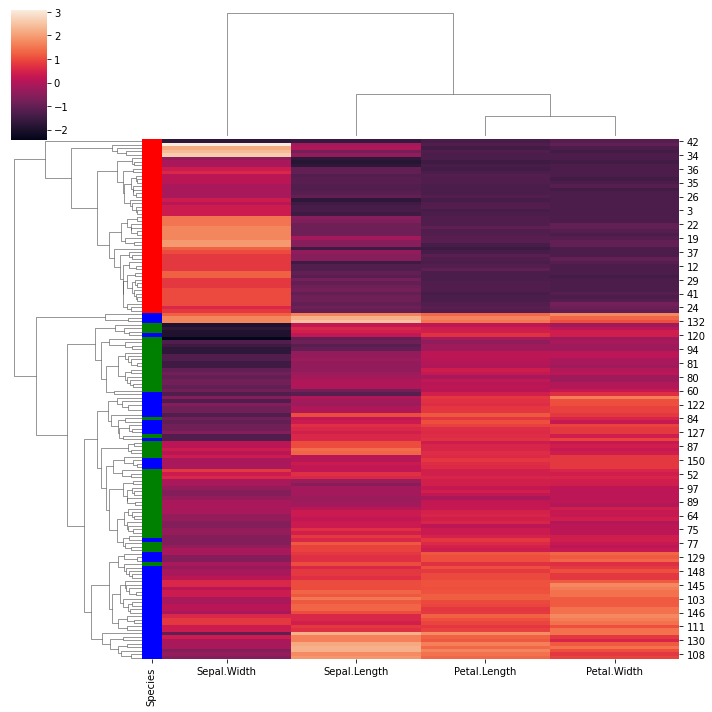

In [15]:
# Assign each of the three species to r, g, or b
lut = dict(zip(iris.Species.unique(), "rgb"))
# Assign a color to each species observation
colors = iris.Species.map(lut)
# Generate the clustermap
sns.clustermap(iris.iloc[:, :-1], z_score=True, row_colors=colors);

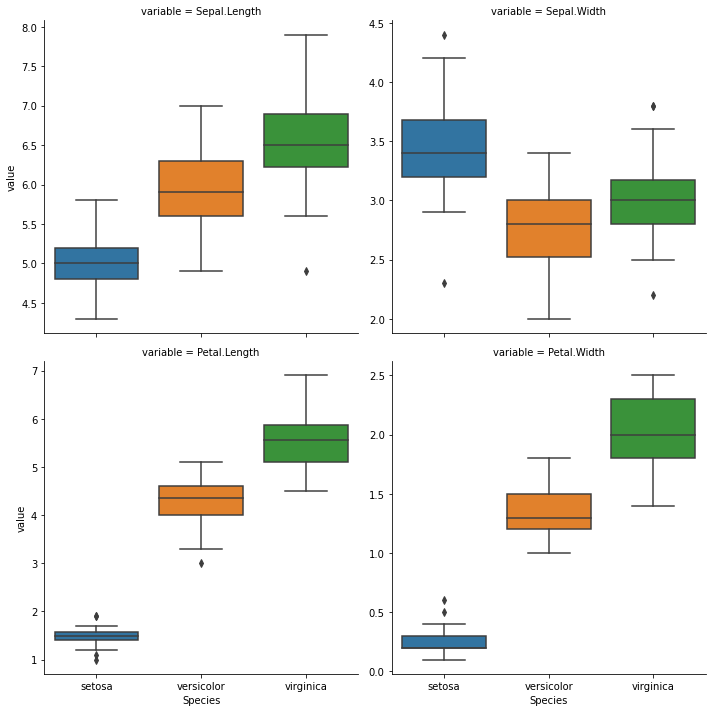

In [16]:
# Convert dataframe to long format
df = pd.melt(iris, id_vars="Species")
sns.catplot(x="Species", y="value", col="variable", col_wrap=2,
            data=df, kind="box", sharey=False);

**4**. (50 points)

This is an example of the messiness of real-life data munging, using a (truncated and randomized) data set provided by an HIV researcher. In this data set, HIV-positive subjects were tested for sexually transmitted infections (STI) at each visit (and treated if they were positive). 

You will probably need to review the `pandas` documentation and examples carefully to complete this exercise.

The file 'hiv.csv' contains data the HIV subjects. The variables are

- PID: A randomly generated patient ID
- Race: The race of the subject as a single letter code
- Age: The age of the subject at study entry
- Visit Date: Date of visit at which STI data was collected
- STIs: Type of STI detected if any

The Race and Age of each subject are only recorded for the first visit.

Objectives:

- Read the data set into a `pandas` DataFrame (5)
- Fill up the missing Race and Age values (5)
- Reclassify the STIs into one of the following categories ('none', 'syphilis', 'chlamydia', 'gonorrhea', 'HCV',  NaN) by grouping in the obvious way. Note that 'none' means no infection and NaN (np.nan) means missing data. (10)
- FInd the subject(s) with the most number of visits (how many are there?) (5)
- Perform a chi-square test to see if an STI at the **first** visit is associated with the risk of an STI at **any** subsequent visit. You only need to do this for subjects who have more than 1 visit. You can use `from scipy.stats import chi2_contingency` to do the $\chi^2$ test. (20)

In [17]:
# Read the dataset
df = pd.read_csv("data/hiv.csv")
df.head()

,Unnamed: 0,PID,Race,Age,Visit Date,STIs
0,0,9933,W,61.0,2013-12-24,none
1,1,9933,NaN,NaN,2015-07-18,none
2,2,9933,NaN,NaN,2016-01-23,none
3,3,9933,NaN,NaN,2013-10-14,syphilis
4,4,9933,NaN,NaN,2013-12-23,none


In [18]:
# Fill in missing values by propogating forward last non-null value
df = df.fillna(method="ffill")
df.head()

,Unnamed: 0,PID,Race,Age,Visit Date,STIs
0,0,9933,W,61.0,2013-12-24,none
1,1,9933,W,61.0,2015-07-18,none
2,2,9933,W,61.0,2016-01-23,none
3,3,9933,W,61.0,2013-10-14,syphilis
4,4,9933,W,61.0,2013-12-23,none


In [19]:
# What STI's are there?
df["STIs"].value_counts()

none                       510
syphilis                    32
chlamydia- rectal           27
gonorrhea- vag/urethral     20
chlamydia- vag/urethral     18
gonorrhea- rectal           16
gonorrhea- OP               13
chlamydia- OP                5
HCV                          3
None                         2
Name: STIs, dtype: int64

In [20]:
# Group STIs by splitting on "-" and keeping first element
df["STIs"] = df["STIs"].str.split("-").str[0].replace("None", "none")

In [21]:
# Subjects with most visits
df.groupby("PID").count()["Visit Date"].max()

16

In [22]:
# How many people had 16 visits?
grouped = df.groupby("PID").count()
grouped[grouped["Visit Date"] == 16]

,Unnamed: 0,Race,Age,Visit Date,STIs
PID,,,,,
9963,16,16,16,16,16


In [23]:
# Pandas option to make sure assignments work properly
pd.set_option("mode.chained_assignment", None)

In [24]:
# Dataframe containing number of visits for each patient, keep only those with multiples
counts = df.groupby("PID")["Visit Date"].count()
counts = counts[counts > 1]

In [25]:
# Keep observations in original dataframe with multiple observations
data = df[df["PID"].isin(counts.index)]

In [26]:
# Create boolean variable for first visit
first_idx = data.groupby("PID")["Visit Date"].transform(min) == data["Visit Date"]

In [27]:
# Create dataframe for first visits
first = data[first_idx]

In [28]:
# List of STIs
stis = ["syphilis", "chlamydia", "gonorrhea", "HCV"]

In [29]:
# Determine whether patient has STI during first visit
first["STI_V1"] = first["STIs"].isin(stis)

In [30]:
# Create dataframe for subsequent visits
rest = data[~first_idx]

In [31]:
# Create variable for STIs at subsequent visits
rest["has_sti"] = rest["STIs"].isin(stis)

In [32]:
# Merge first and grouped observations from rest
final = first.set_index("PID")
final["STI_VN"] = rest.groupby("PID")["has_sti"].max()

In [33]:
# Correlation of initial and subsequent STIs
final["STI_V1"].corr(final["STI_VN"], method="spearman")

0.5044786714379604

In [34]:
# Confusion Matrix
table = pd.crosstab(final.STI_V1, final.STI_VN)
table

STI_VN,False,True
STI_V1,,
False,89,17
True,12,26


In [35]:
# Perform chi-squared test on confusion matrix
c, p, dof, expected = chi2_contingency(table)
p

5.000040406617746e-09